# Components analysis

In this notebook we analyse the usage of components in data stories.

In [43]:
import json
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors

color_palette = ['#5565cf', '#b14ecf', '#cf4773', '#cf913f', '#87cf38', '#30cf6b', '#29a1cf', '#2138cf']

file_path = 'data_stories_summary.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [44]:
# Calculate the number of elements per story
elements_per_story = []
for story_id, story_data in data.items():
    num_elements = len(story_data.get("elements", []))
    elements_per_story.append(num_elements)

# Calculate total number of elements (including duplicates across stories)
total_elements = sum(elements_per_story)

# Print summary statistics
print("\nElements per Story Statistics:")
print(f"Total number of elements (across all stories): {total_elements}")
print(f"Min: {min(elements_per_story)}")
print(f"Max: {max(elements_per_story)}")
print(f"Mean: {np.mean(elements_per_story):.2f}")
print(f"Median: {np.median(elements_per_story)}")


Elements per Story Statistics:
Total number of elements (across all stories): 708
Min: 4
Max: 31
Mean: 13.88
Median: 13.0


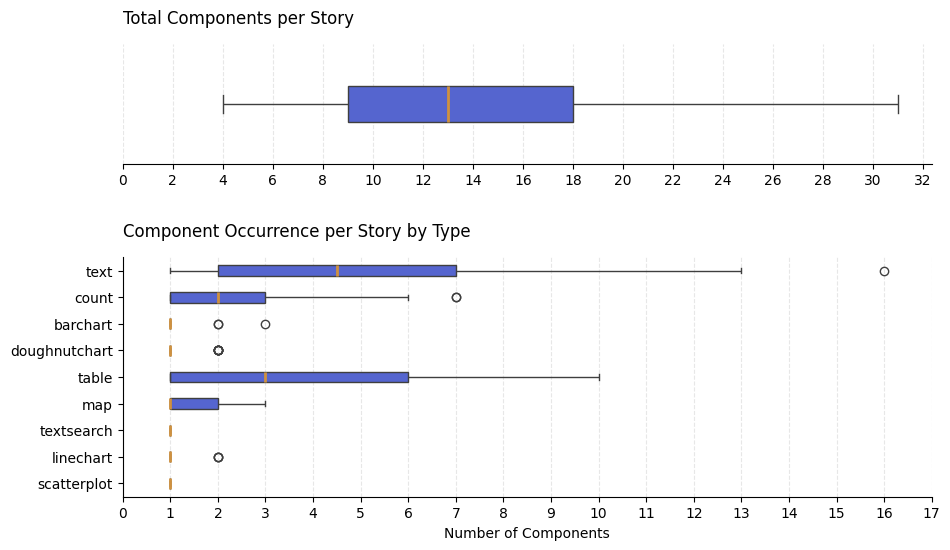

In [ ]:
element_story_values = []

for story_id, story_data in data.items():
    raw_elements = story_data.get("elements", [])
    viz_types = story_data.get("viz_types", [])

    processed_elements = []
    viz_added = False  # track if we've already added viz_types

    for el in raw_elements:
        if el == "data viz" and not viz_added:
            processed_elements.extend(viz_types)
            viz_added = True
        elif el != "data viz":
            processed_elements.append(el)

    # Count how many times each element appears in this story
    element_counts = Counter(processed_elements)

    # Build long-form list for DataFrame
    for element, count in element_counts.items():
        element_story_values.append({
            "Element": element,
            "Count": count
        })


element_box_df = pd.DataFrame(element_story_values)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), height_ratios=[1, 2], sharex=False)

# Top Plot: Total Elements per Story
sns.boxplot(
    x=elements_per_story,
    ax=axes[0],
    orient='h',
    width=0.3,
    boxprops=dict(facecolor=color_palette[0]),
    medianprops=dict(color=color_palette[3], linewidth=2)
)
axes[0].set_title('Total Components per Story', fontsize=12, pad=15, loc='left')
axes[0].set_xlabel('')
axes[0].set_yticks([])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)
max_val_top = max(elements_per_story)
axes[0].set_xticks(range(0, max_val_top + 2, 2))

# Bottom Plot: Element Occurrence per Story by Type
sns.boxplot(
    data=element_box_df,
    x='Count',
    y='Element',
    ax=axes[1],
    width=0.4,
    boxprops=dict(facecolor=color_palette[0]),
    medianprops=dict(color=color_palette[3], linewidth=2)
)
axes[1].set_title('Component Occurrence per Story by Type', fontsize=12, pad=15, loc='left')
axes[1].set_xlabel('Number of Components', fontsize=10)
axes[1].set_ylabel('')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)
max_val_bottom = element_box_df["Count"].max()
axes[1].set_xticks(range(0, max_val_bottom + 2, 1))

plt.tight_layout(pad=2.5)
# Save as JPG with 300 dpi
# plt.savefig("outputs/img/1.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/1.eps", format="eps", bbox_inches="tight")
plt.show()


In [51]:
story_elements = {}

for story_id, story_data in data.items():
    story_elements[story_id] = story_data['elements_order']

df = pd.DataFrame()

for story, elements in story_elements.items():
    # Create a temporary df for the current story
    temp_df = pd.DataFrame.from_dict(elements, orient='index', columns=[story])
    
    # Transpose to have the order as columns and the story as rows
    temp_df = temp_df.T
    df = pd.concat([df, temp_df], sort=False)

print(df)

                 1           2         3           4           5           6  \
D-hp3wDV      text       count     count    data viz    data viz    data viz   
y4Srva15      text       count  data viz    data viz    data viz    data viz   
7qpfziir      text        text     count       count       count        text   
Nokx0yU6      text  textsearch  data viz    data viz         NaN         NaN   
gz_gxhYn      text       count     count       count        text    data viz   
U2OtB3XT      text        text     count        text       count        text   
v4h_GSI0      text       count  data viz    data viz        text    data viz   
1ptR3pru      text       count     count    data viz    data viz    data viz   
JQpdcw-d      text        text     count       count    data viz    data viz   
B9SLlUry      text       count     count    data viz    data viz    data viz   
r7i-PG2n      text        text     count       count        text    data viz   
AUmcnOzL      text       count      text

C:\Users\giuli\AppData\Local\Temp\ipykernel_23048\3795414815.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  index_mapped_df = df.applymap(lambda x: label_to_index.get(x) if pd.notna(x) else np.nan)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


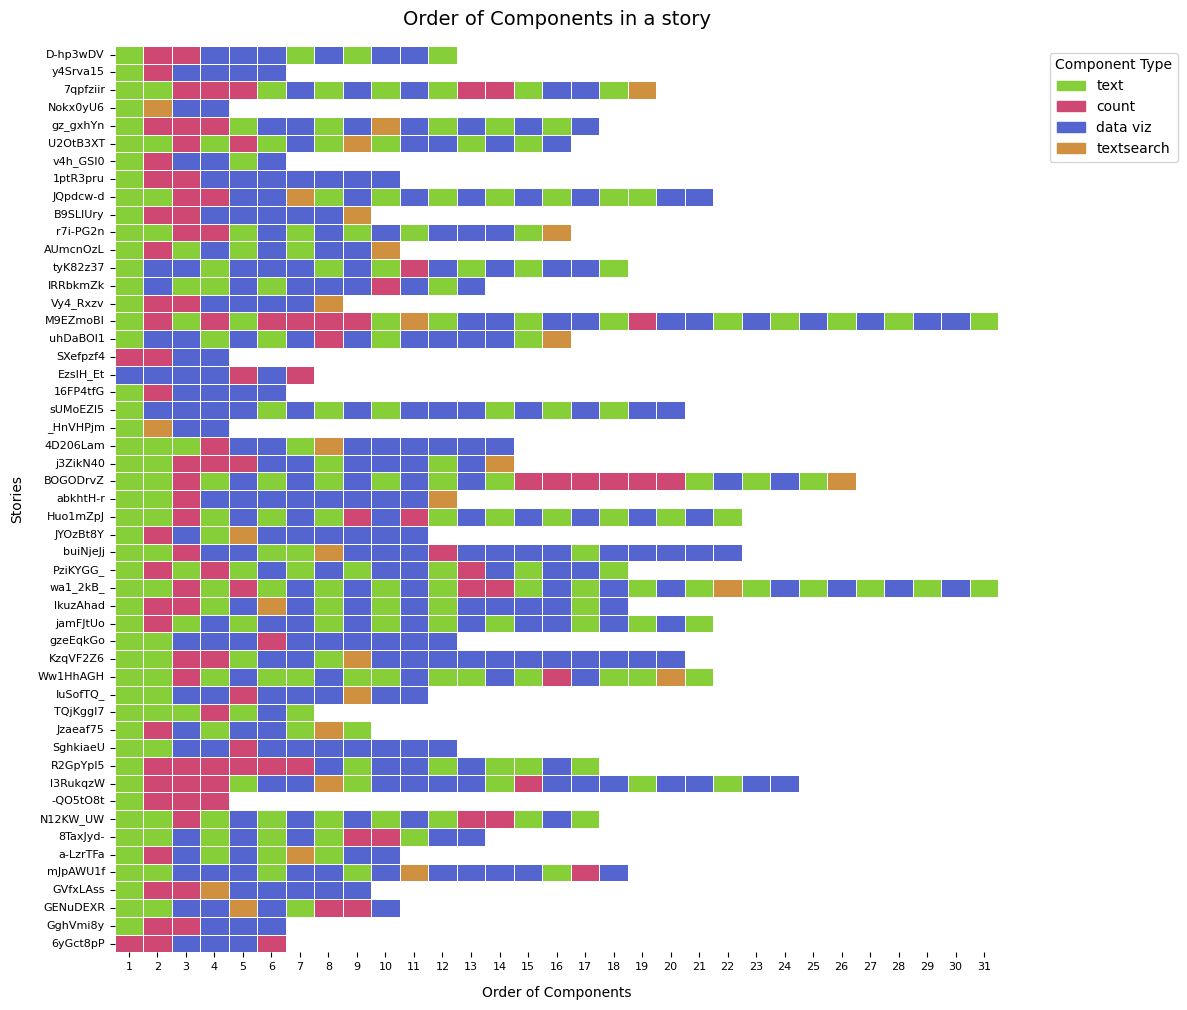

In [ ]:
# Get unique elements for the legend
unique_labels = pd.unique(df.values.ravel('K'))
unique_labels = [label for label in unique_labels if pd.notna(label)]

# Create a mapping from labels to indices
label_to_index = {label: i for i, label in enumerate(unique_labels)}

# Map the df values to indices, ignoring NaNs
index_mapped_df = df.applymap(lambda x: label_to_index.get(x) if pd.notna(x) else np.nan)

# Dynamically set figure size based on the number of rows (stories)
num_stories = index_mapped_df.shape[0]
fig_width = 12 
fig_height = max(8, num_stories * 0.2)

# Create the color map
cmap = sns.color_palette([color_palette[4], color_palette[2], color_palette[0], color_palette[3]], len(unique_labels))
norm = mcolors.BoundaryNorm(boundaries=np.arange(len(unique_labels)+1)-0.5, ncolors=len(unique_labels))

plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(index_mapped_df, cmap=mcolors.ListedColormap(cmap), norm=norm, linewidths=.5, cbar=False, mask=index_mapped_df.isna())

handles = [plt.Rectangle((0, 0), 1, 1, color=cmap[i]) for i in range(len(unique_labels))]
plt.legend(handles, unique_labels, title="Component Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
plt.title('Order of Components in a story', fontsize=14, pad=15)
plt.xlabel('Order of Components', fontsize=10, labelpad=10)
plt.ylabel('Stories', fontsize=10, labelpad=10)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()

# Save as JPG with 300 dpi
# plt.savefig("outputs/img/2.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
plt.savefig("outputs/img/2.eps", format="eps", bbox_inches="tight")
plt.show()


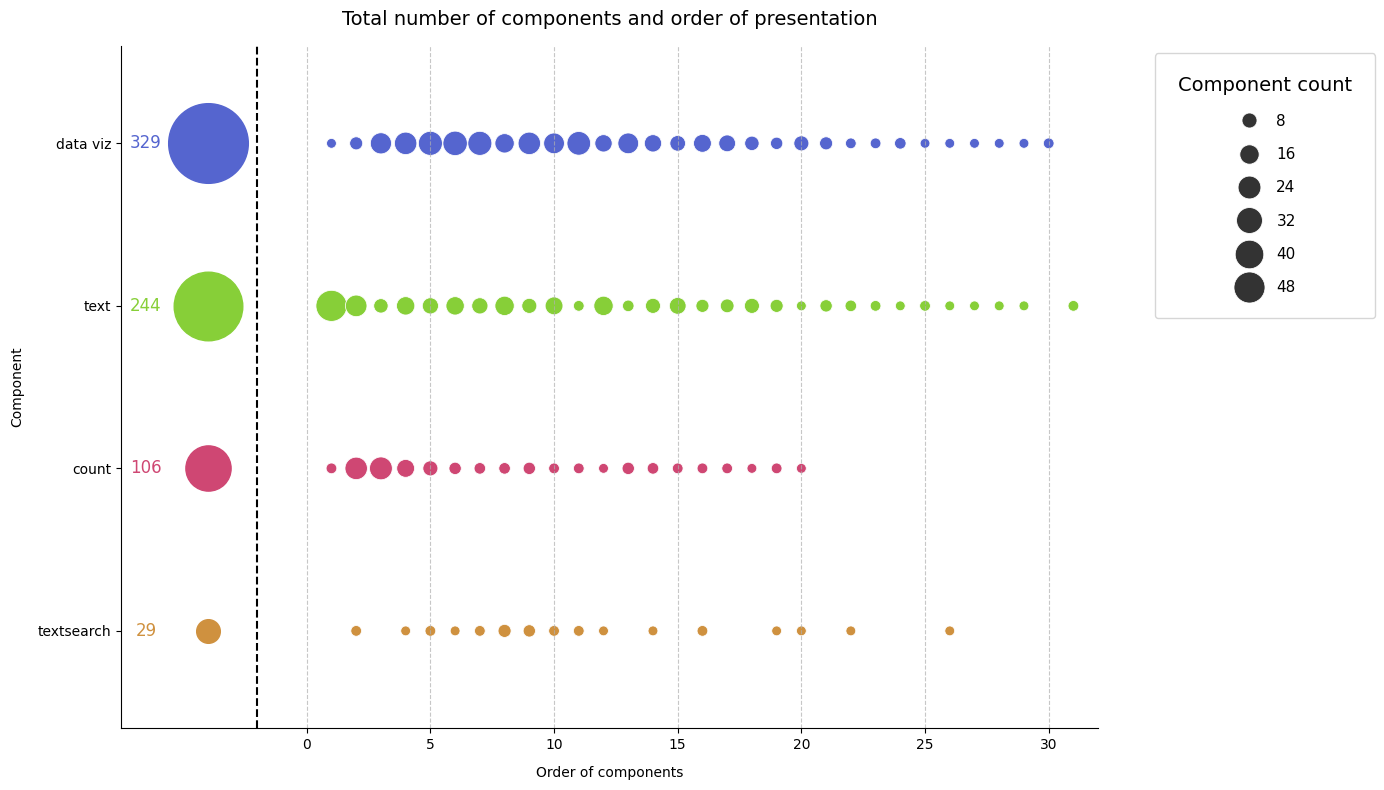

In [ ]:
flat_data = []
for story_id, elements in story_elements.items():
    for position, element in elements.items():
        flat_data.append({'Story': story_id, 'Order': int(position), 'Element': element})

# Convert to DataFrame
df = pd.DataFrame(flat_data)

# Aggregate the data
df_agg = df.groupby(['Element', 'Order']).size().reset_index(name='Count')

# Calculate the total occurrences of each element
total_occurrences = df.groupby('Element').size().reset_index(name='Total')

# Sort elements by decreasing total occurrence
total_occurrences = total_occurrences.sort_values(by='Total', ascending=False)

# Merge the total occurrences with the aggregated data
df_final = pd.merge(df_agg, total_occurrences, on='Element')
df_final['Element'] = pd.Categorical(df_final['Element'], categories=total_occurrences['Element'], ordered=True)

# Define a color palette
palette = sns.color_palette([color_palette[0], color_palette[4], color_palette[2], color_palette[3]], len(df_final['Element'].unique()))

# Create a dictionary mapping elements to colors
color_dict = {element: palette[i] for i, element in enumerate(df_final['Element'].cat.categories)}

# Plot the bubble chart
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(
    data=df_final,
    x='Order', y='Element', size='Count', hue='Element',
    sizes=(50, 500), palette=color_dict, legend='brief'
)

# Adjust positioning of the total occurrences and use the same color as the bubbles
y_positions = total_occurrences['Element']
for i, element in enumerate(y_positions):
    total_value = total_occurrences.loc[total_occurrences['Element'] == element, 'Total'].values[0]
    plt.scatter(-4, element, s=total_value * 10, color=color_dict[element], zorder=5)
    plt.text(-6.5, element, str(total_value), ha='center', va='center', fontsize=12, color=color_dict[element])

# Customize the plot
plt.title('Total number of components and order of presentation', fontsize=14, pad=15)
plt.xlabel('Order of components', fontsize=10, labelpad=10)
plt.ylabel('Component', fontsize=10, labelpad=10)

# Increase the space on the left to avoid hiding the numbers and bubbles
plt.xlim(-7.5, df_final['Order'].max() + 1)
plt.xticks(ticks=[0, 5, 10, 15, 20, 25, 30])  # Set x-axis ticks starting from 0

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add a dashed line separating 'Total' from 'Order of action'
plt.axvline(x=-2, color='black', linestyle='--')

handles, labels = scatter_plot.get_legend_handles_labels()
size_handles = []
size_labels = []
for h, l in zip(handles, labels):
    if l.isdigit():
        size_handles.append(h)
        size_labels.append(l)

plt.legend(
    handles=size_handles, labels=size_labels,
    title="Component count",
    title_fontsize='14',
    fontsize='11',
    bbox_to_anchor=(1.05, 1), loc='upper left',
    labelspacing=1.2,
    borderpad=1.5,
    frameon=True,
)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.margins(y=0.2)
plt.tight_layout()

# Save as JPG with 300 dpi
# plt.savefig("outputs/img/3.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/3.eps", format="eps", bbox_inches="tight")
plt.show()

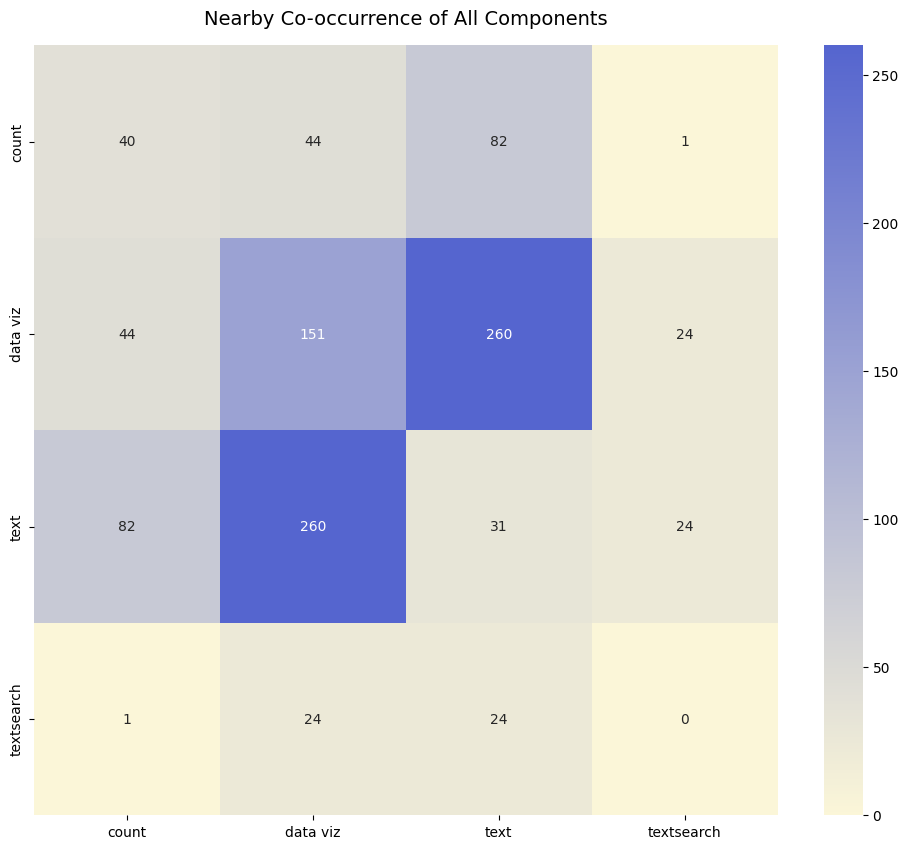

In [ ]:
# dictionary to hold pairs of elements that are near each other
nearby_co_occurrences = defaultdict(int)

for story_id, story_data in data.items():
    elements = story_data.get('elements', [])
    
    # Check pairs of elements that are adjacent
    for i in range(len(elements) - 1):
        current_element = elements[i]
        next_element = elements[i + 1]
        pair = tuple(sorted([current_element, next_element]))
        nearby_co_occurrences[pair] += 1

unique_elements = sorted(set([element for pair in nearby_co_occurrences.keys() for element in pair]))
co_occurrence_matrix = pd.DataFrame(0, index=unique_elements, columns=unique_elements)

for (element1, element2), count in nearby_co_occurrences.items():
    co_occurrence_matrix.at[element1, element2] = count
    co_occurrence_matrix.at[element2, element1] = count

# Define the starting and ending colors
end_color = color_palette[0]
start_color = "#FBF6D8"
# Create a custom colormap from the start to end colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [start_color, end_color])

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, fmt=".0f", cmap=custom_cmap)
plt.title("Nearby Co-occurrence of All Components", fontsize=14, pad=15)

# Save as JPG with 300 dpi
# plt.savefig("outputs/img/4.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/4.eps", format="eps", bbox_inches="tight")
plt.show()



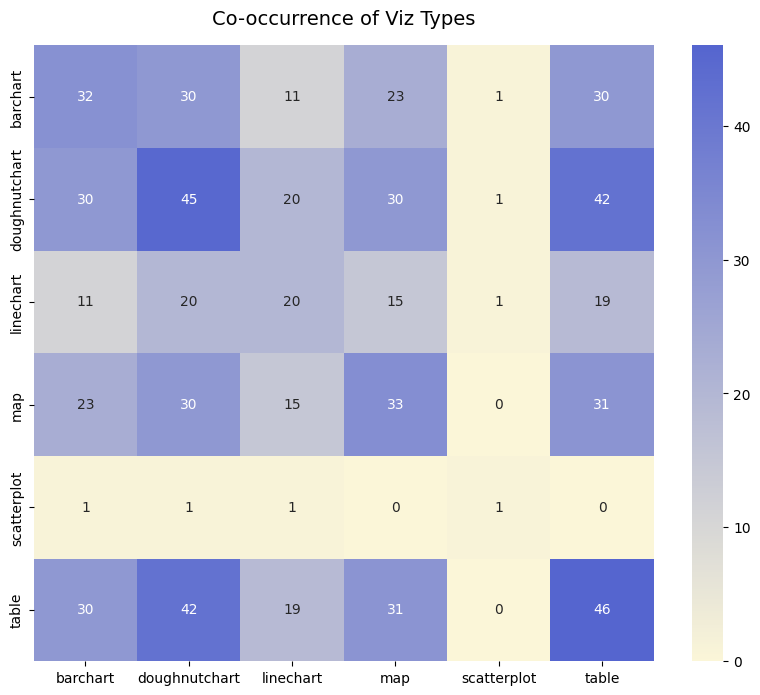

In [ ]:
# Extract unique chart types across all stories
unique_charts = set()
for story_id, story_data in data.items():
    unique_charts.update(story_data.get('viz_types', []))

unique_charts = sorted(unique_charts)

# Create a binary matrix for chart co-occurrences
chart_matrix = pd.DataFrame(0, index=data.keys(), columns=unique_charts)

for story_id, story_data in data.items():
    for chart in story_data.get('viz_types', []):
        chart_matrix.at[story_id, chart] = 1

# Calculate the co-occurrence matrix
co_occurrence_matrix = np.dot(chart_matrix.T, chart_matrix)

# Convert to DataFrame for better readability
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=unique_charts, columns=unique_charts)

# Define the starting and ending colors
end_color = color_palette[0]
start_color = "#FBF6D8"

# Create a custom colormap from the start to end colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [start_color, end_color])

# Plotting a heatmap of co-occurrences
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_df, annot=True, cmap=custom_cmap)
plt.title("Co-occurrence of Viz Types", fontsize=14, pad=15)
# Save as JPG with 300 dpi
# plt.savefig("outputs/img/5.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/5.eps", format="eps", bbox_inches="tight")
plt.show()

In [64]:
elements_list = []
viz_types_list = []
element_story_count = defaultdict(int)
viz_story_count = defaultdict(int)

# Loop through each story and count unique elements per story
for story_id, story_data in data.items():
    elements = set(story_data.get("elements", []))
    data_viz = set(story_data.get("viz_types", []))
    for element in elements:
        element_story_count[element] += 1
    for viz in data_viz:
        viz_story_count[viz] += 1

for story_id, story_data in data.items():
    elements_list.extend(story_data.get("elements", []))
    viz_types_list.extend(story_data.get("viz_types", []))

# Count frequency of each element and chart type
element_counts = Counter(elements_list)
chart_type_counts = Counter(viz_types_list)

# Convert to DataFrame for better visualization
elements_df = pd.DataFrame(element_counts.items(), columns=["Element", "Count"])
elements_df["Story Count"] = elements_df["Element"].map(element_story_count)
elements_df = elements_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

viz_types_df = pd.DataFrame(chart_type_counts.items(), columns=["Data Viz Type", "Count"])
viz_types_df["Story Count"] = viz_types_df["Data Viz Type"].map(viz_story_count)
viz_types_df = viz_types_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

print(f'Total Number of Data Stories: {len(data)}')
print("Element Usage Frequency:")
print(elements_df)

print("\nChart Type Usage Frequency:")
print(viz_types_df)

Total Number of Data Stories: 51
Element Usage Frequency:
      Element  Count  Story Count
0    data viz    329           50
1        text    244           48
2       count    106           48
3  textsearch     29           29

Chart Type Usage Frequency:
   Data Viz Type  Count  Story Count
0          table    173           46
1  doughnutchart     52           45
2            map     44           33
3       barchart     36           32
4      linechart     23           20
5    scatterplot      1            1


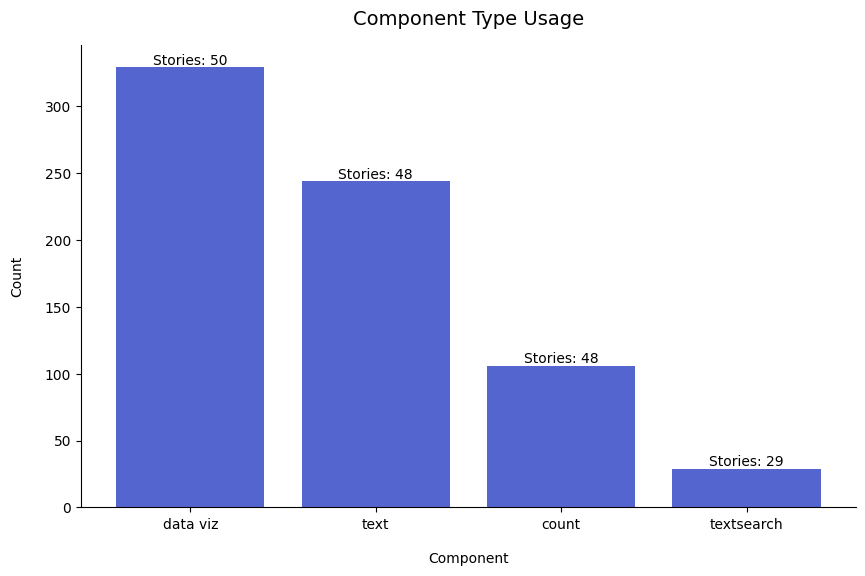

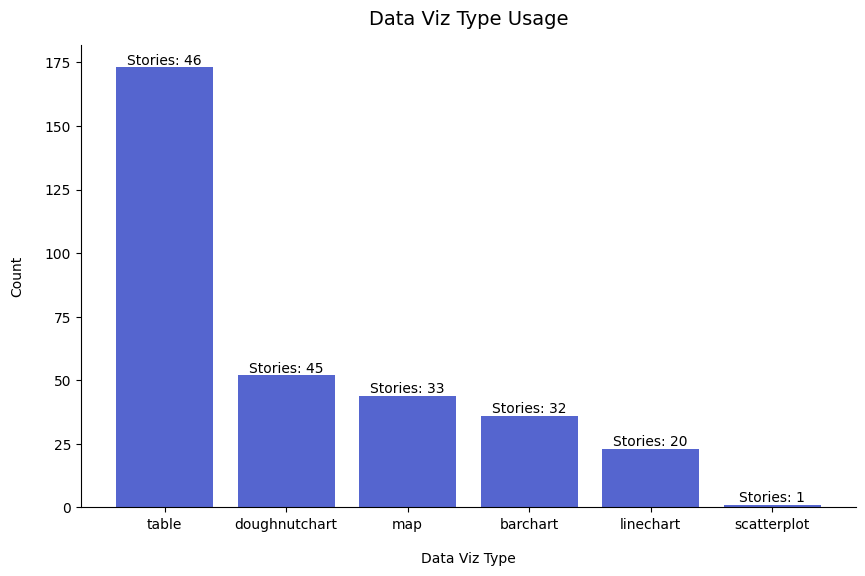

In [ ]:
# Plot element usage
plt.figure(figsize=(10, 6))
bars = plt.bar(elements_df['Element'], elements_df['Count'], color=color_palette[0])
plt.title('Component Type Usage', fontsize=14, pad=15)
plt.xlabel('Component', labelpad=15)
plt.ylabel('Count', labelpad=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for bar, story_count in zip(bars, elements_df["Story Count"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'Stories: {story_count}', ha='center', va='bottom')
plt.show()

# Plot chart type usage
plt.figure(figsize=(10, 6))
viz_bars = plt.bar(viz_types_df['Data Viz Type'], viz_types_df['Count'], color=color_palette[0])
plt.title('Data Viz Type Usage', fontsize=14, pad=15)
plt.xlabel('Data Viz Type', labelpad=15)
plt.ylabel('Count', labelpad=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for bar, story_count in zip(viz_bars, viz_types_df["Story Count"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'Stories: {story_count}', ha='center', va='bottom')

# Save as JPG with 300 dpi
# plt.savefig("outputs/img/6.jpg", dpi=300, bbox_inches="tight", format="jpg")

# Save as EPS (vector format, resolution-independent)
# plt.savefig("outputs/img/6.eps", format="eps", bbox_inches="tight")
plt.show()

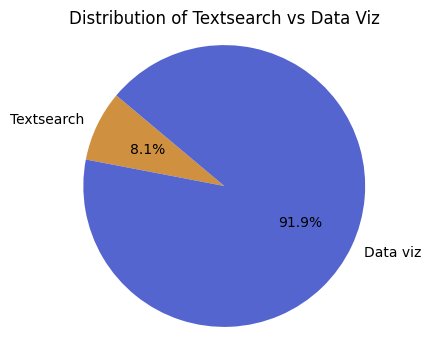

In [71]:
# Initialize counters
textsearch_count = 0
chart_table_count = 0

# Iterate over each story
for story_id, story_data in data.items():
    # Count textsearch elements
    textsearch_count += story_data['elements'].count('textsearch')
    
    # Count charts and tables
    chart_table_count += len(story_data.get('viz_types', []))

# pie chart to visualize the distribution
labels = ['Textsearch', 'Data viz']
sizes = [textsearch_count, chart_table_count]
colors = [color_palette[3],color_palette[0]]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Textsearch vs Data Viz')
plt.axis('equal')
plt.show()

Textsearches per Data Story: Max = 1, Min = 0, Avg = 0.57
Actions per Textsearch: Max = 11, Min = 0, Avg = 2.14


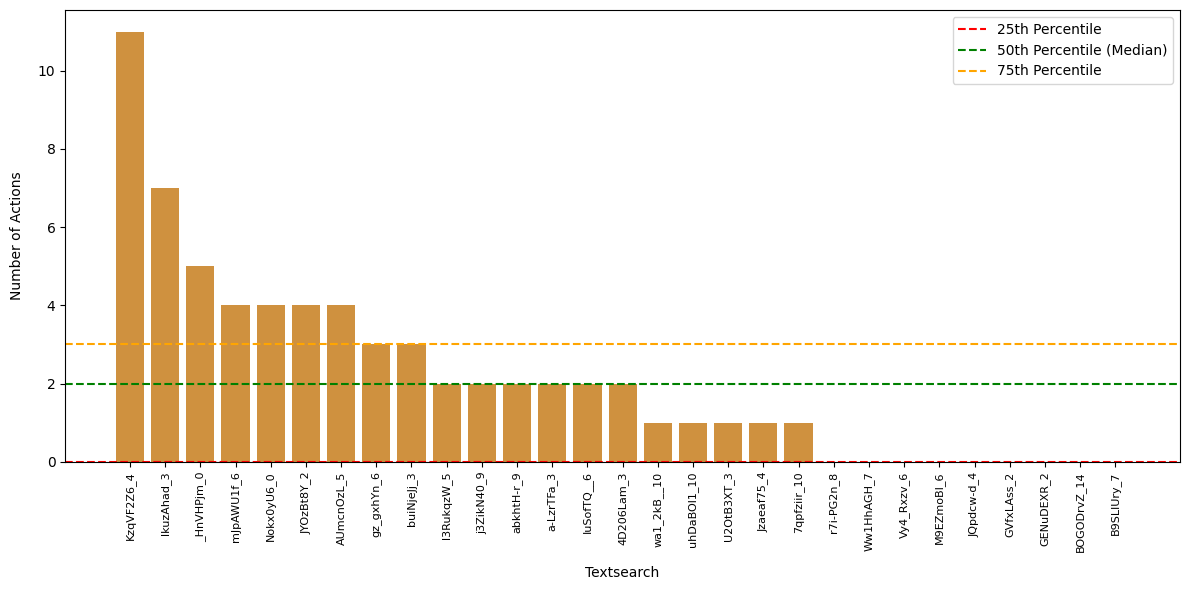

25th Percentile: 0.0
50th Percentile (Median): 2.0
75th Percentile: 3.0


In [72]:
textsearch_labels = []  # Labels for the X-axis
actions_per_textsearch = []  # Number of actions per textsearch
textsearches_per_story = []  # Number of textsearches per data story

# Loop over all data stories
for story_id, story_data in data.items():
    textsearch_count = 0  # Count textsearches in each data story
    for idx, textsearch in enumerate(story_data.get('queries', [])):
        if textsearch['type'] == 'textsearch':
            textsearch_count += 1
            textsearch_labels.append(f"{story_id}_{idx}")
            # Count the total number of actions in this textsearch
            actions = textsearch.get('actions', {})
            num_actions = sum(len(action_list) for action_list in actions.values())
            actions_per_textsearch.append(num_actions)
    
    textsearches_per_story.append(textsearch_count)

# Calculate statistics for textsearches per data story
max_textsearches = max(textsearches_per_story)
min_textsearches = min(textsearches_per_story)
avg_textsearches = np.mean(textsearches_per_story)

# Calculate statistics for actions per textsearch
max_actions = max(actions_per_textsearch)
min_actions = min(actions_per_textsearch)
avg_actions = np.mean(actions_per_textsearch)

# Print statistics
print(f"Textsearches per Data Story: Max = {max_textsearches}, Min = {min_textsearches}, Avg = {avg_textsearches:.2f}")
print(f"Actions per Textsearch: Max = {max_actions}, Min = {min_actions}, Avg = {avg_actions:.2f}")

sorted_data = sorted(zip(actions_per_textsearch, textsearch_labels), reverse=True)
sorted_actions_per_textsearch, sorted_textsearch_labels = zip(*sorted_data)

# Calculate percentiles
p25 = np.percentile(sorted_actions_per_textsearch, 25)
p50 = np.percentile(sorted_actions_per_textsearch, 50)
p75 = np.percentile(sorted_actions_per_textsearch, 75)

# Bar Chart (Textsearches vs. Number of Actions)
plt.figure(figsize=(12, 6))
plt.bar(sorted_textsearch_labels, sorted_actions_per_textsearch, color=color_palette[3])
plt.xticks(rotation=90, fontsize=8)
# plt.title('Number of Actions per Textsearch')
plt.xlabel('Textsearch', labelpad=10)
plt.ylabel('Number of Actions', labelpad=10)
plt.axhline(p25, color='red', linestyle='--', label='25th Percentile')
plt.axhline(p50, color='green', linestyle='--', label='50th Percentile (Median)')
plt.axhline(p75, color='orange', linestyle='--', label='75th Percentile')
plt.legend()
plt.tight_layout()
plt.show()
print(f"25th Percentile: {p25}")
print(f"50th Percentile (Median): {p50}")
print(f"75th Percentile: {p75}")